### Importação dos dados



In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [3]:
loja['loja_id'] = 1
loja2['loja_id'] = 2
loja3['loja_id'] = 3
loja4['loja_id'] = 4

df_completo = pd.concat([loja, loja2, loja3, loja4])

faturamento_por_loja = df_completo.groupby('loja_id')['Preço'].sum().reset_index()

faturamento_por_loja.columns = ['Loja', 'Faturamento']

print(faturamento_por_loja)

   Loja  Faturamento
0     1   1534509.12
1     2   1488459.06
2     3   1464025.03
3     4   1384497.58


Gráfico do faturamento salvo como faturamento_por_loja.png


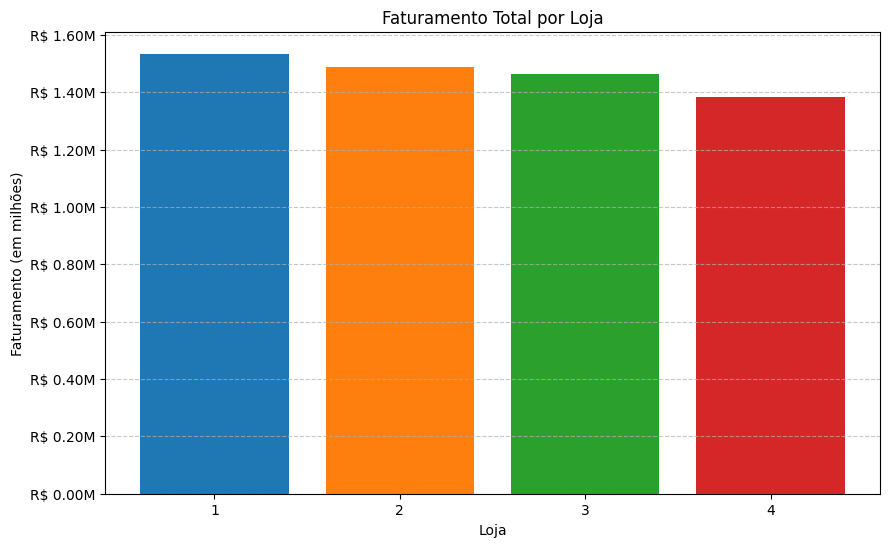

In [6]:
plt.figure(figsize=(10, 6))
bars = plt.bar(faturamento_por_loja['Loja'], faturamento_por_loja['Faturamento'], color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])

plt.ylabel('Faturamento (em milhões)')
plt.xlabel('Loja')
plt.title('Faturamento Total por Loja')
plt.xticks(faturamento_por_loja['Loja'])
plt.ticklabel_format(style='plain', axis='y')

formatter = plt.FuncFormatter(lambda x, pos: f'R$ {x/1e6:.2f}M')
plt.gca().yaxis.set_major_formatter(formatter)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('faturamento_por_loja.png')
print("Gráfico do faturamento salvo como faturamento_por_loja.png")

/tmp/ipython-input-1146291988.py:7: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_temporal['Data da Compra'] = pd.to_datetime(df_temporal['Data da Compra'])


Gráfico de linha com a tendência de faturamento (separado por loja) salvo como tendencia_faturamento_separado.png


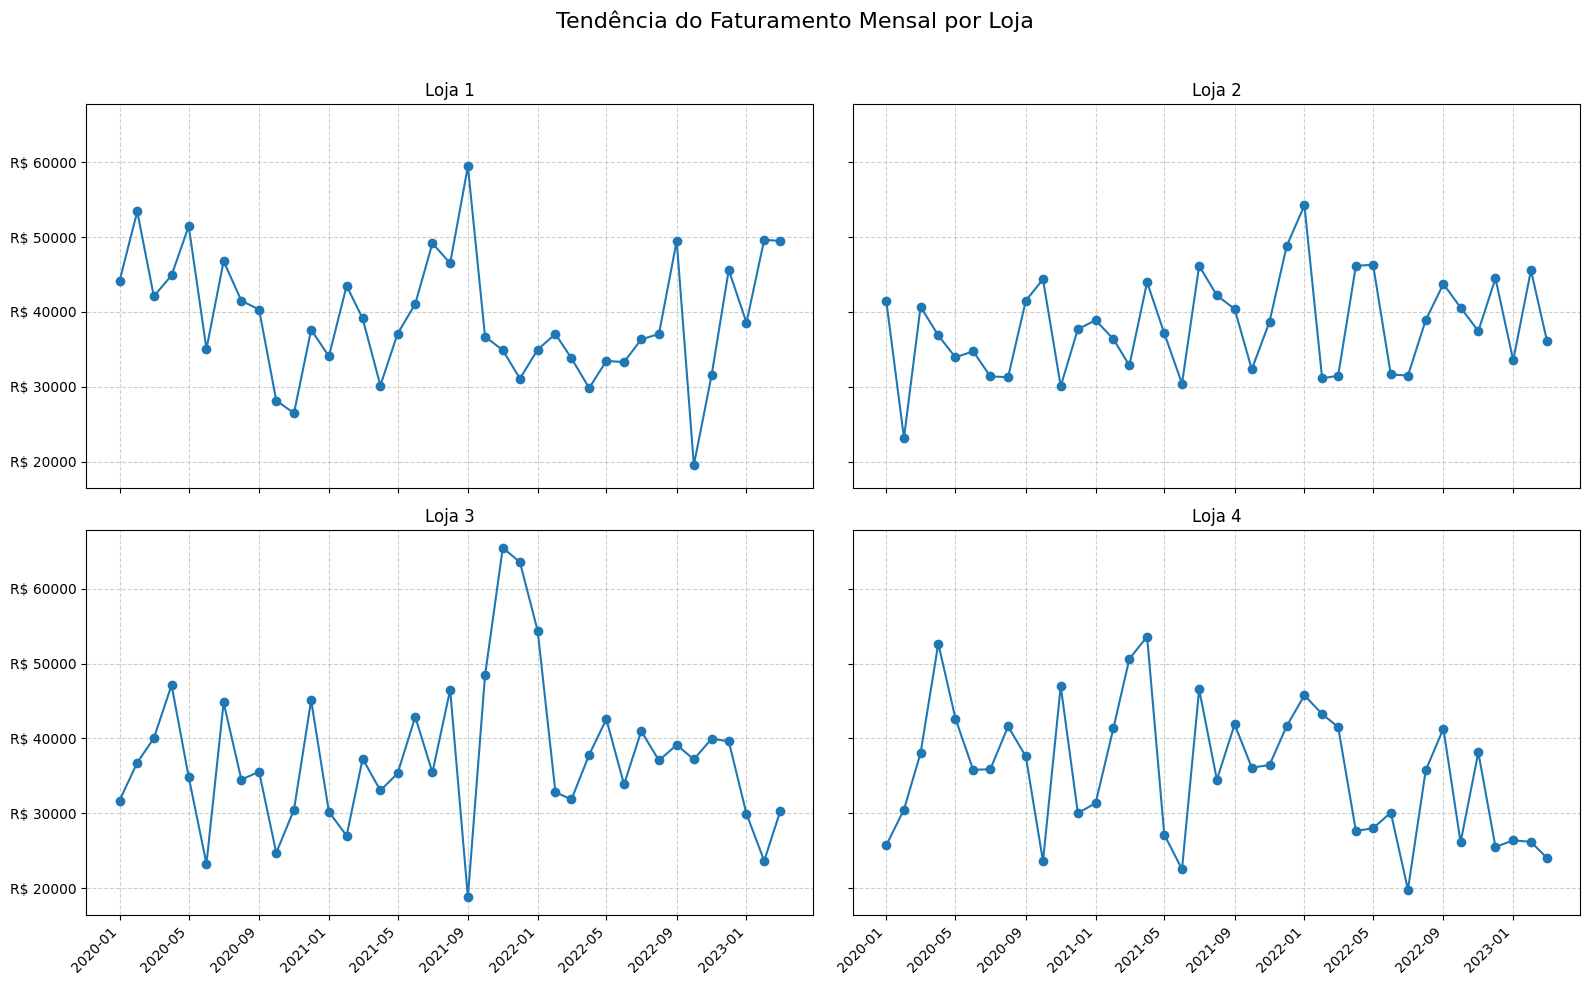

In [18]:
df_temporal = df_completo.copy()
df_temporal['Data da Compra'] = pd.to_datetime(df_temporal['Data da Compra'])
df_temporal['Mes'] = df_temporal['Data da Compra'].dt.to_period('M')

faturamento_mensal = df_temporal.groupby(['Mes', 'loja_id'])['Preço'].sum().unstack()
faturamento_mensal.index = faturamento_mensal.index.to_timestamp()


fig, axes = plt.subplots(2, 2, figsize=(16, 10), sharex=True, sharey=True)
axes = axes.flatten()


for i, loja_id in enumerate(faturamento_mensal.columns):
    ax = axes[i]
    ax.plot(faturamento_mensal.index, faturamento_mensal[loja_id], marker='o', linestyle='-')
    ax.set_title(f'Loja {loja_id}')
    ax.grid(True, linestyle='--', alpha=0.6)


    formatter = mtick.FormatStrFormatter('R$ %.0f')
    ax.yaxis.set_major_formatter(formatter)


    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_ha('right')


fig.suptitle('Tendência do Faturamento Mensal por Loja', fontsize=16)


plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.savefig('tendencia_faturamento_separado.png')
print("Gráfico de linha com a tendência de faturamento (separado por loja) salvo como tendencia_faturamento_separado.png")

# 2. Vendas por Categoria


In [4]:
vendas_por_categoria = df_completo.groupby(['loja_id', 'Categoria do Produto']).size().reset_index(name='Numero de Vendas')

print(vendas_por_categoria)

    loja_id   Categoria do Produto  Numero de Vendas
0         1             brinquedos               324
1         1       eletrodomesticos               312
2         1            eletronicos               448
3         1        esporte e lazer               284
4         1  instrumentos musicais               182
5         1                 livros               173
6         1                 moveis               465
7         1  utilidades domesticas               171
8         2             brinquedos               313
9         2       eletrodomesticos               305
10        2            eletronicos               422
11        2        esporte e lazer               275
12        2  instrumentos musicais               224
13        2                 livros               197
14        2                 moveis               442
15        2  utilidades domesticas               181
16        3             brinquedos               315
17        3       eletrodomesticos            

Gráfico de pizza com a composição de vendas salvo como composicao_vendas_pizza.png


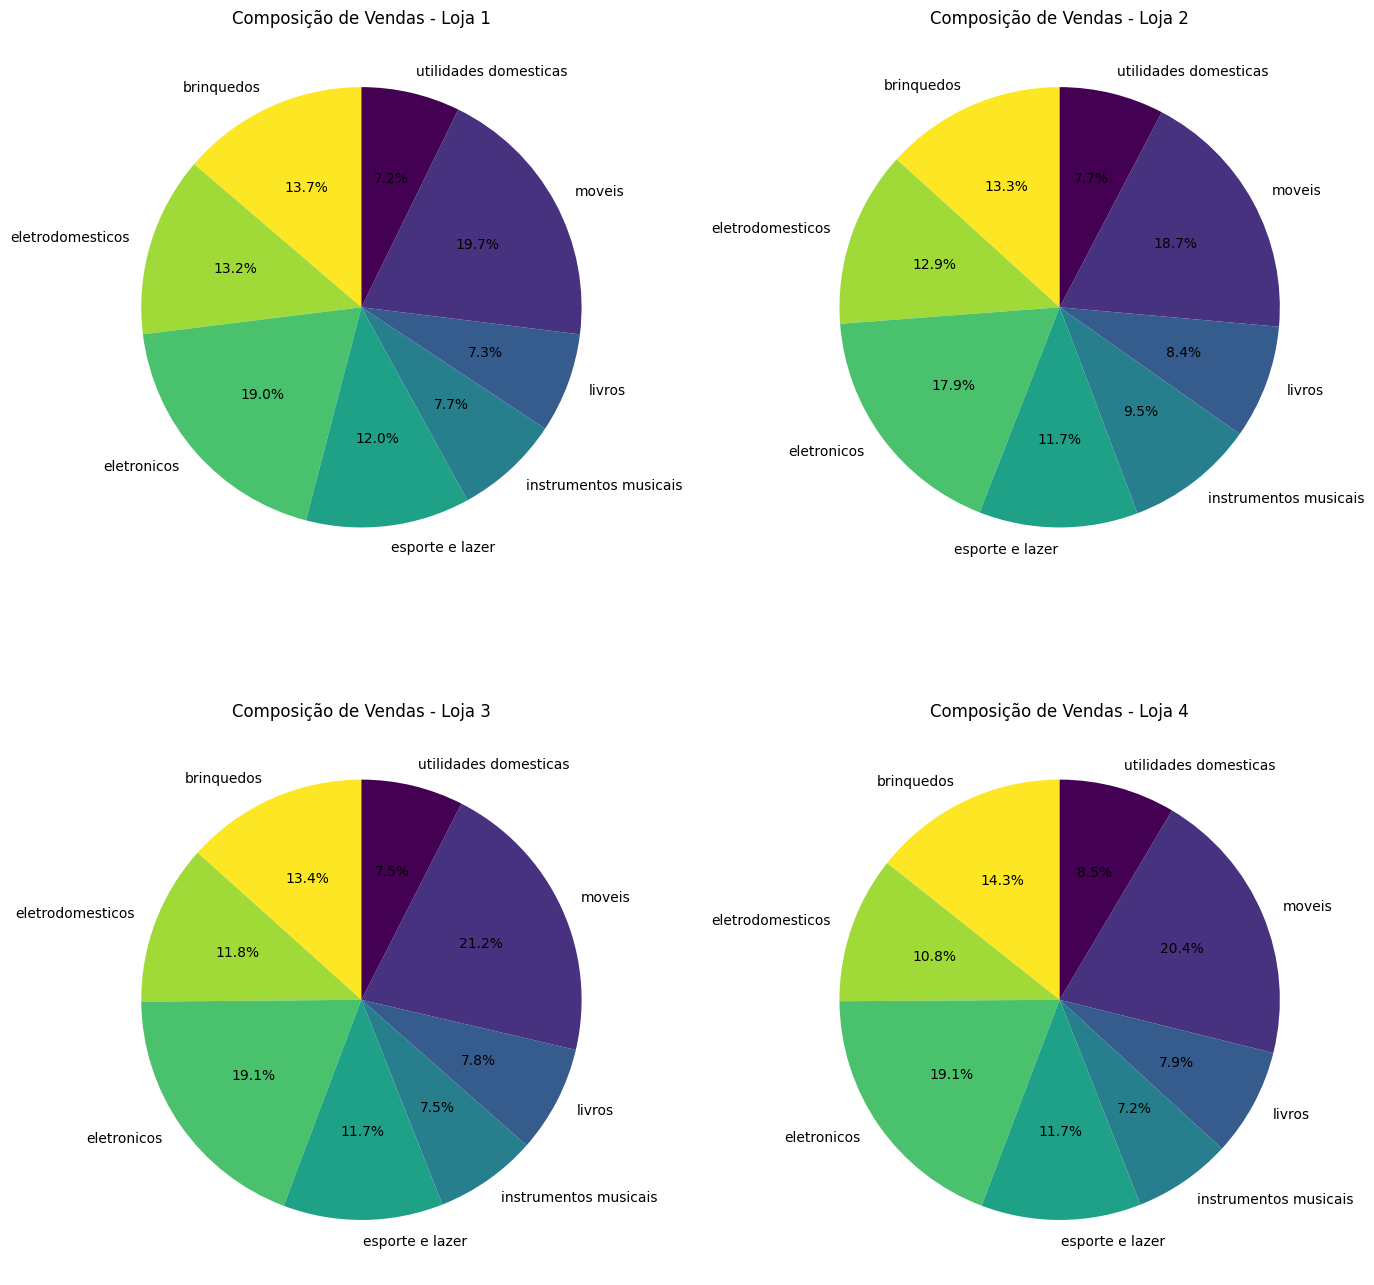

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(14, 14))
axes = axes.flatten()
colors = plt.cm.viridis_r(np.linspace(0, 1, len(vendas_por_categoria['Categoria do Produto'].unique())))

for i, loja_id in enumerate(sorted(vendas_por_categoria['loja_id'].unique())):
    ax = axes[i]
    dados_loja = vendas_por_categoria[vendas_por_categoria['loja_id'] == loja_id]

    ax.pie(dados_loja['Numero de Vendas'], labels=dados_loja['Categoria do Produto'], autopct='%1.1f%%', startangle=90, colors=colors)
    ax.set_title(f'Composição de Vendas - Loja {loja_id}')

plt.tight_layout()
plt.savefig('composicao_vendas_pizza.png')
print("Gráfico de pizza com a composição de vendas salvo como composicao_vendas_pizza.png")

# 3. Média de Avaliação das Lojas

In [9]:
avaliacao_media_loja = df_completo.groupby('loja_id')['Avaliação da compra'].mean().reset_index()

avaliacao_media_loja.columns = ['Loja', 'Avaliacao Media']

print(avaliacao_media_loja)

   Loja  Avaliacao Media
0     1         3.976685
1     2         4.037304
2     3         4.048326
3     4         3.995759


Gráfico da avaliação média salvo como avaliacao_media_loja.png


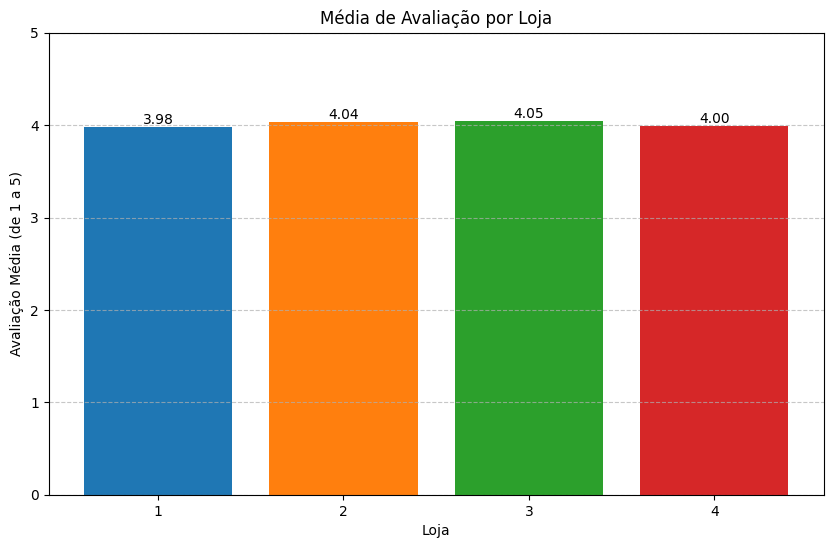

In [10]:
plt.figure(figsize=(10, 6))
bars = plt.bar(avaliacao_media_loja['Loja'], avaliacao_media_loja['Avaliacao Media'], color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}', va='bottom', ha='center')

plt.ylabel('Avaliação Média (de 1 a 5)')
plt.xlabel('Loja')
plt.title('Média de Avaliação por Loja')
plt.xticks(avaliacao_media_loja['Loja'])

plt.ylim(0, 5)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('avaliacao_media_loja.png')

print("Gráfico da avaliação média salvo como avaliacao_media_loja.png")

# 4. Produtos Mais e Menos Vendidos

In [11]:
contagem_produtos = df_completo['Produto'].value_counts()

produtos_mais_vendidos = contagem_produtos.nlargest(5).reset_index()
produtos_mais_vendidos.columns = ['Produto', 'Quantidade Vendida']

produtos_menos_vendidos = contagem_produtos.nsmallest(5).reset_index()
produtos_menos_vendidos.columns = ['Produto', 'Quantidade Vendida']

print("---------- 5 PRODUTOS MAIS VENDIDOS ----------")
print(produtos_mais_vendidos)
print("\n")
print("---------- 5 PRODUTOS MENOS VENDIDOS ----------")
print(produtos_menos_vendidos)

---------- 5 PRODUTOS MAIS VENDIDOS ----------
                    Produto  Quantidade Vendida
0                    Cômoda                 210
1  Carrinho controle remoto                 206
2               Micro-ondas                 206
3                   Bateria                 203
4                 Cama king                 201


---------- 5 PRODUTOS MENOS VENDIDOS ----------
                       Produto  Quantidade Vendida
0                 Celular ABXY                 157
1                      Headset                 158
2                      Mochila                 163
3                     Guitarra                 165
4  Ciência de dados com python                 166


Gráfico com o ranking de produtos salvo como ranking_produtos.png


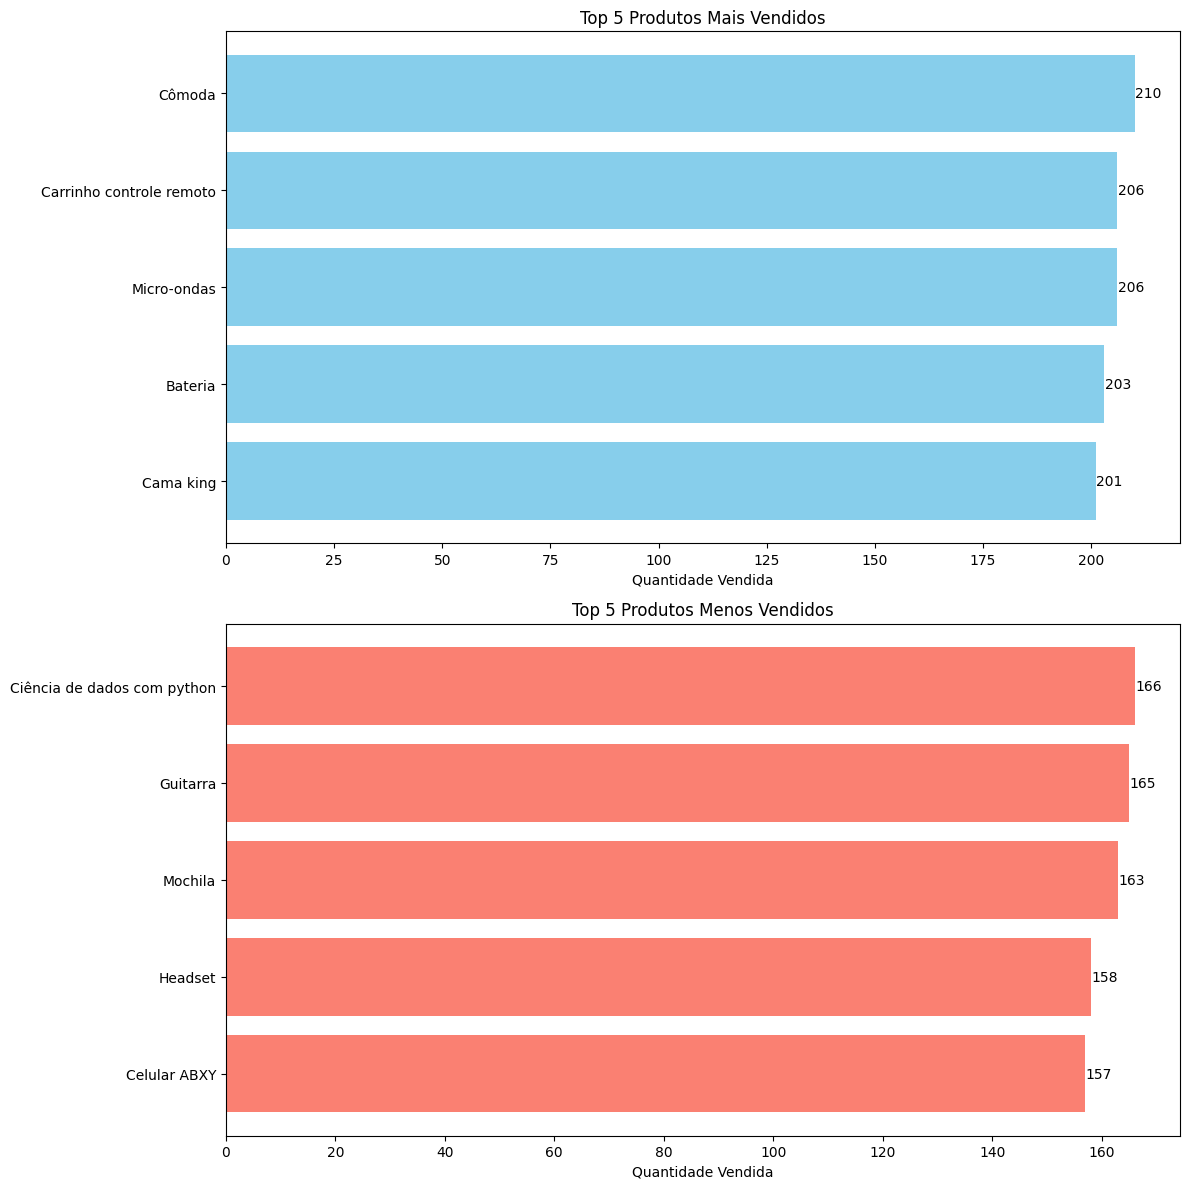

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 12))

mais_vendidos_sorted = produtos_mais_vendidos.sort_values('Quantidade Vendida', ascending=True)
axes[0].barh(mais_vendidos_sorted['Produto'], mais_vendidos_sorted['Quantidade Vendida'], color='skyblue')
axes[0].set_title('Top 5 Produtos Mais Vendidos')
axes[0].set_xlabel('Quantidade Vendida')

menos_vendidos_sorted = produtos_menos_vendidos.sort_values('Quantidade Vendida', ascending=True)
axes[1].barh(menos_vendidos_sorted['Produto'], menos_vendidos_sorted['Quantidade Vendida'], color='salmon')
axes[1].set_title('Top 5 Produtos Menos Vendidos')
axes[1].set_xlabel('Quantidade Vendida')

for i, ax in enumerate(axes):
    for bar in ax.patches:
        ax.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2., f'{int(bar.get_width())}', va='center')


plt.tight_layout()
plt.savefig('ranking_produtos.png')
print("Gráfico com o ranking de produtos salvo como ranking_produtos.png")

# 5. Frete Médio por Loja


In [13]:
frete_medio_loja = df_completo.groupby('loja_id')['Frete'].mean().reset_index()

frete_medio_loja.columns = ['Loja', 'Frete Medio']

print(frete_medio_loja)

   Loja  Frete Medio
0     1    34.691805
1     2    33.621941
2     3    33.074464
3     4    31.278997


Gráfico do frete médio salvo como frete_medio_loja.png


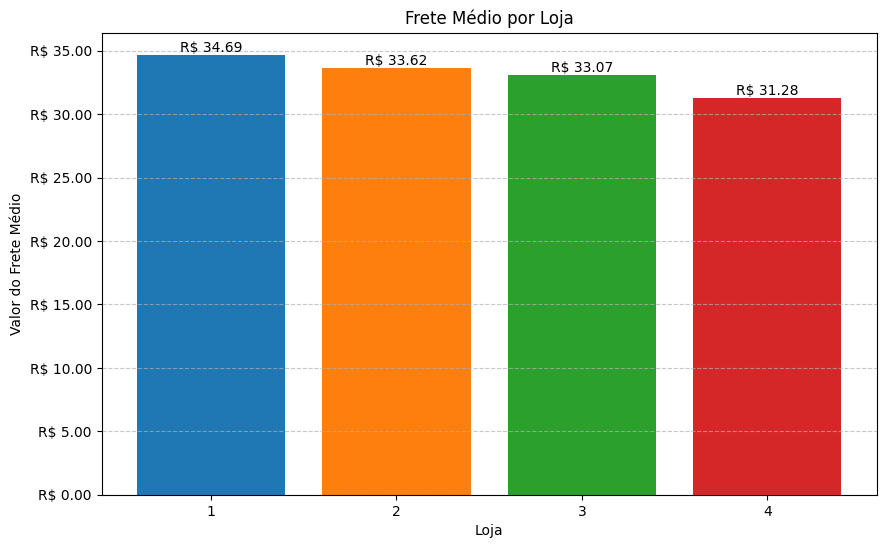

In [14]:
import matplotlib.ticker as mtick

plt.figure(figsize=(10, 6))
bars = plt.bar(frete_medio_loja['Loja'], frete_medio_loja['Frete Medio'], color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'R$ {yval:.2f}', va='bottom', ha='center')


formatter = mtick.FormatStrFormatter('R$ %.2f')
plt.gca().yaxis.set_major_formatter(formatter)


plt.ylabel('Valor do Frete Médio')
plt.xlabel('Loja')
plt.title('Frete Médio por Loja')
plt.xticks(frete_medio_loja['Loja'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('frete_medio_loja.png')

print("Gráfico do frete médio salvo como frete_medio_loja.png")